# House Price
Daniel Poblano

In [1]:
#Importamos datos para análisis exploratorio de datos

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
#Cargamos la base y creamos columna con fecha, para establecer una variable como serie de tiempo

housing = pd.read_csv("train.csv")
housing['TmSold']=  pd.to_datetime(housing.YrSold.astype(str) + '-' + housing.MoSold.astype(str))
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TmSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01


In [3]:
#se cuentan los tipos para separar y tratarla diferente

housing.dtypes.value_counts()

object            43
int64             35
float64            3
datetime64[ns]     1
dtype: int64

In [4]:
#trabajamos con las variables categoricas por separado

df_cat=housing.select_dtypes(include='object')

In [5]:
#Obtenemos la descripción para cada columna,
df_cat.describe(include='all').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [6]:
#Con la linea anterior vemos que hay variables que tienen datos nulos, 
#por lo que nos quedamos con los que tengan más del 80% de los datos
df_cat=df_cat[df_cat.columns[df_cat.isnull().mean() < 0.8]]

In [7]:
df_cat.describe(include='all').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [8]:
#Para cada columna de las variables categoricas, remplazamos valores nulos por
#la moda en la columna. Esto como fill con mean pero para categoricas

for col in df_cat.columns.tolist():
    df_cat[col]=df_cat[col].fillna(df_cat[col].mode()[0])
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [9]:
# Verificamos que ya todas las columnas tienen el mismo conteo
df_cat.describe(include='all').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [10]:
#Transformamos las variables a dummies de 0s y 1s, eliminamos una columna de cada variable 
#para reducir variables y evitar multicolinealidad.

dummy_cathegorical=pd.get_dummies(df_cat, drop_first=True)
dummy_cathegorical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
#Ahora, tomamos las variables numérica y de tiempo
df_num=housing.select_dtypes(include=['int64','float64','datetime64'])
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TmSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,2008-02-01
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,2007-05-01
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,2008-09-01
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,2006-02-01
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,2007-08-01
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,2010-02-01
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,2010-05-01
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,2010-04-01


In [12]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [13]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TmSold'],
      dtype='object')

In [14]:
#Eliminamos id porque no aporta y, Mes y Año ya están en TmSold

df_num.drop(['Id','MoSold','YrSold'], axis = 1,inplace = True)

/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
#completamos los datos nulos
df_num=df_num.fillna(df_num.mean())

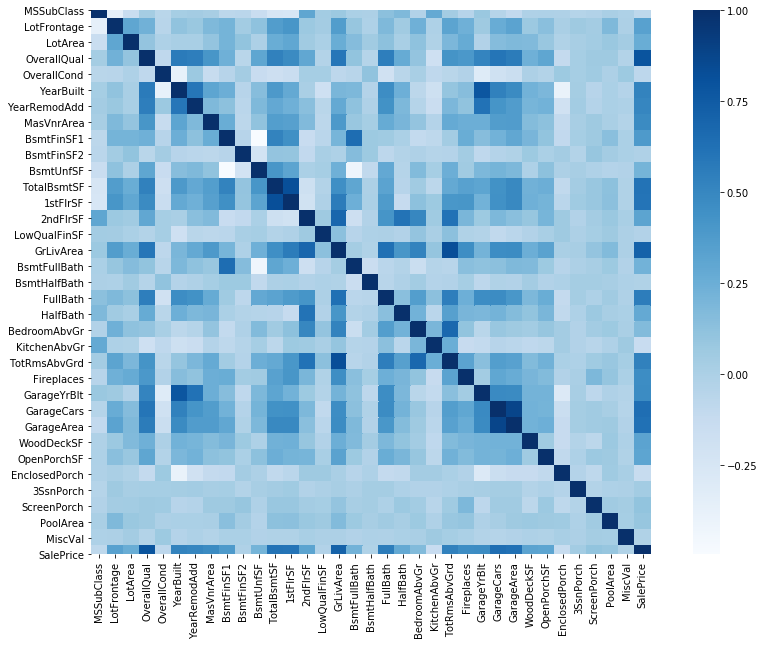

In [16]:
#EL heatmap nos ayuda a ver que tan correlacionadas están la variables
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_num.corr(),square=True,cmap='Blues')

In [17]:
#housing=housing.select_dtypes(include=['int64','datetime64[ns]']).join(dummy_cathegorical)
housing=df_num.join(dummy_cathegorical)

In [18]:
#mostramos el top de variables con alta correlacion, esto ayuda a saber si hay variables útiles
Corr_house=pd.DataFrame(housing.corr()['SalePrice'].sort_values())
Corr_house[-10:]

,SalePrice
YearBuilt,0.522897
TotRmsAbvGrd,0.533723
FullBath,0.560664
1stFlrSF,0.605852
TotalBsmtSF,0.613581
GarageArea,0.623431
GarageCars,0.640409
GrLivArea,0.708624
OverallQual,0.790982
SalePrice,1.000000


1.8828757597682129
6.536281860064529


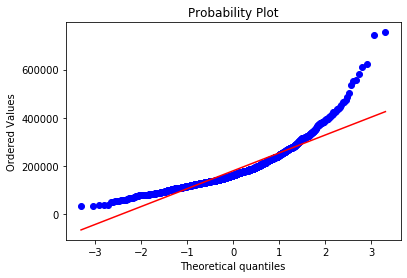

In [19]:
#Mostramos una grafica de probabilidad normal, para saber que tan ajustado está a una regresión lineal
#Obtengo curtosis y sesgo para tener idea de como se distribuyen los precios

from scipy.stats import norm
from scipy import stats
res = stats.probplot(housing['SalePrice'], dist=norm,fit=True, plot=plt)
print(housing['SalePrice'].skew())
print(housing['SalePrice'].kurt())

In [20]:
#realizamos una transformación logaritmica sólo a los datos con sesgo mayor a 0.8, 
#no tan bajo para evitar overfitting pero para que nos ayude a mejorar la r2


sesgo = df_num.select_dtypes(include=['int64','float64']).apply(lambda x: skew(x))
sesgo = sesgo[abs(sesgo) > .8]
ses_col = sesgo.index
df_num[ses_col] = np.log1p(df_num[ses_col])
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TmSold
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699,2008-02-01
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016,2007-05-01
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171,2008-09-01
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405,2006-02-01
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.429220,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,12.072547,2007-08-01
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.254868,2010-02-01
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,12.493133,2010-05-01
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,11.864469,2010-04-01


In [21]:
#unimos los dos dataframes 
housing=df_num.join(dummy_cathegorical)
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=236)

In [22]:
#Obtenemos el top de variables correlacionadas con SalePrice
Corr_house=pd.DataFrame(housing.corr()['SalePrice'].sort_values())
Corr_house[-10:]

,SalePrice
TotRmsAbvGrd,0.534422
YearRemodAdd,0.565608
YearBuilt,0.586570
FullBath,0.594771
1stFlrSF,0.608955
GarageArea,0.650888
GarageCars,0.680625
GrLivArea,0.730254
OverallQual,0.817185
SalePrice,1.000000


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer,  make_column_selector
from numpy.random import seed, randn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [24]:
#Separamos los datos en train y test
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]
xtest, ytest = test.drop("SalePrice", axis=1), test["SalePrice"]

In [25]:
#creamos función que nos ayudará a transformar los datos
def transform_time(X):
    df = pd.DataFrame(X)
    return df.apply(lambda x: pd.to_datetime(x).apply(lambda x: x.timestamp()))

In [26]:
#selección de variables y creación de pipeline
column_selector = ColumnTransformer(
    [
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float",'Int64'])),
     ('convert_time', FunctionTransformer(transform_time, validate=False),['TmSold'])]
)
pipe = Pipeline([
    ("select_cols", column_selector),
    ("ridge", Ridge(alpha=0.1, solver="cholesky"))])

In [27]:
#cross validate del pipeline creado

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]

mae = -cv["test_neg_mean_absolute_error"]

/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.11158e-18): result may not be accurate.
  overwrite_a=True).T
/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.08158e-18): result may not be accurate.
  overwrite_a=True).T
/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.152e-18): result may not be accurate.
  overwrite_a=True).T
/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.09204e-18): result may not be accurate.
  overwrite_a=True).T
/Users/danielpoblano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.06515e-18): result may n

In [28]:
print(f"mean r2: {r2.mean():0.5f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.86471
mean mae: 0.10


In [29]:
#Se intentan varios modelos, sin icluir la columna de fecha

In [30]:
housing=df_num.select_dtypes(include=['int64','float64']).join(dummy_cathegorical)

In [31]:
#Recalcula train y test
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]
xtest, ytest = test.drop("SalePrice", axis=1), test["SalePrice"]

In [32]:
#Ridge 
reg1 = Ridge(alpha = 0.1 )
reg1.fit(xtrain, ytrain)
prediction = reg1.predict(xtest)
r2_reg1 = reg1.score(xtest, ytest)

In [33]:
r2_reg1

0.8799400464832708

In [34]:
#ocupamos GridSerch para la regresión 1 y la nombramos reg2, encontramos un mejor parametro para alpha
param_grid = { 'alpha': [i/100 for i in range(1,20)]}
reg2 = GridSearchCV(estimator= reg1, param_grid= param_grid, n_jobs=-1)
reg2.fit(xtrain, ytrain)
r2_reg2=reg2.score(xtest, ytest)

In [35]:
#mejoramos r2_reg1 y guardamos en r2_reg2
r2_reg2

0.8883756343717585

In [36]:
#Ocupamos un ensemble method, con una regresión lineal

from sklearn.ensemble import BaggingRegressor

reg3 = BaggingRegressor(base_estimator=LinearRegression(),n_estimators = 10, max_samples = 20, max_features = 200)
reg3.fit(xtrain, ytrain)
prediction3 = reg3.predict(xtest)
r2_reg3 = reg3.score(xtest, ytest)

In [37]:
r2_reg3

0.7835230410296554

In [38]:
#Cross validation para regresión lasso

alpha = [i/100 for i in range(1,400)]
reg4 = LassoCV(n_alphas = 200, alphas = alpha , cv = 10)
reg4.fit(xtrain, ytrain)
prediction4 = reg4.predict(xtest)
r2_reg4 = reg4.score(xtest, ytest) 
r2_reg4

0.8663192091272989

In [39]:
#voting obtiene el estimador que mas se repite de los modelos ocupado, no se ocupa reg1 
#ya que este se encuantra dentro de reg2

from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor([('BAG_R', reg3), ('GS_CV', reg2), ('LassoCV', reg4)])
ereg.fit(xtrain, ytrain)
prediction5 = ereg.predict(xtest)
r2 = ereg.score(xtest, ytest) 

In [40]:
r2

0.8988558200169232

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, prediction5)

0.09189115587282214